In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt


In [2]:
og = pd.read_csv('../data/processed/SeoulBikeData2.csv', encoding='cp1252')
df = og.copy()
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.head()

,Date,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Year,Month,Day,WeekDay,WeekDayEncoding
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,1,0,0,0,1,2017,12,1,Friday,5
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,1,0,0,0,1,2017,12,1,Friday,5
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,1,0,0,0,1,2017,12,1,Friday,5
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,1,0,0,0,1,2017,12,1,Friday,5
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,1,0,0,0,1,2017,12,1,Friday,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        8760 non-null   datetime64[ns]
 1   Rented Bike Count           8760 non-null   int64         
 2   Hour                        8760 non-null   int64         
 3   Temperature(Â°C)            8760 non-null   float64       
 4   Humidity(%)                 8760 non-null   int64         
 5   Wind speed (m/s)            8760 non-null   float64       
 6   Visibility (10m)            8760 non-null   int64         
 7   Dew point temperature(Â°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)     8760 non-null   float64       
 9   Rainfall(mm)                8760 non-null   float64       
 10  Snowfall (cm)               8760 non-null   float64       
 11  Holiday                     8760 non-null   int64       

In [4]:
df.describe()

,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Year,Month,Day,WeekDayEncoding
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,0.049315,0.966324,0.249315,0.252055,0.252055,0.246575,2017.915068,6.526027,15.720548,4.002740
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.216537,0.180404,0.432641,0.434217,0.434217,0.431042,0.278796,3.448048,8.796749,1.998056
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,4.000000,8.000000,2.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,7.000000,16.000000,4.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2018.000000,10.000000,23.000000,6.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,12.000000,31.000000,7.000000


C:\Users\LUCAS\AppData\Local\Temp\ipykernel_17816\765081765.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')


<AxesSubplot:>

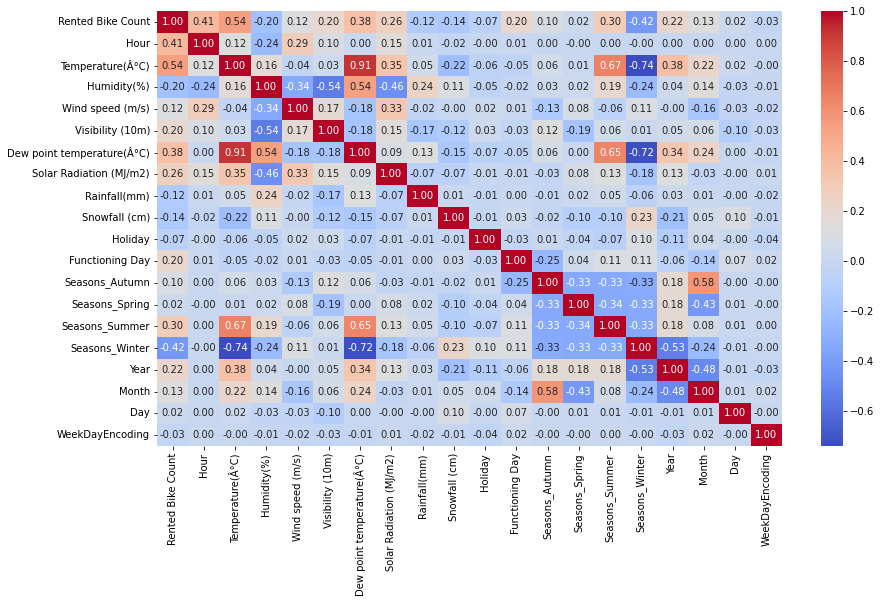

In [11]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')

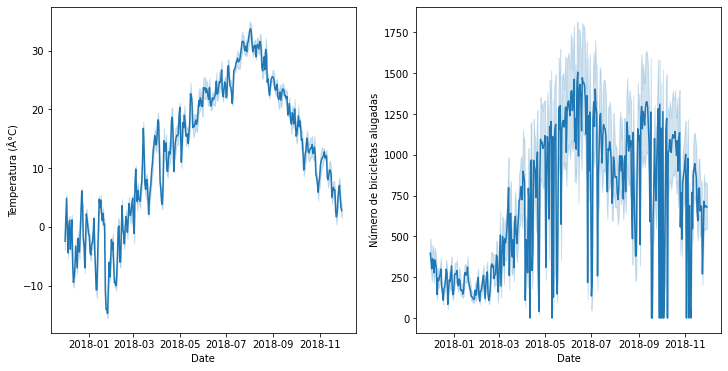

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the temperature data
sns.lineplot(data=df, x='Date', y='Temperature(Â°C)', ax=ax[0])
ax[0].set_ylabel('Temperatura (Â°C)')

# Plot the rented bike count data
sns.lineplot(data=df, x='Date', y='Rented Bike Count', ax=ax[1])
ax[1].set_ylabel('Número de bicicletas alugadas')

plt.show()

In [13]:
df.Year.value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


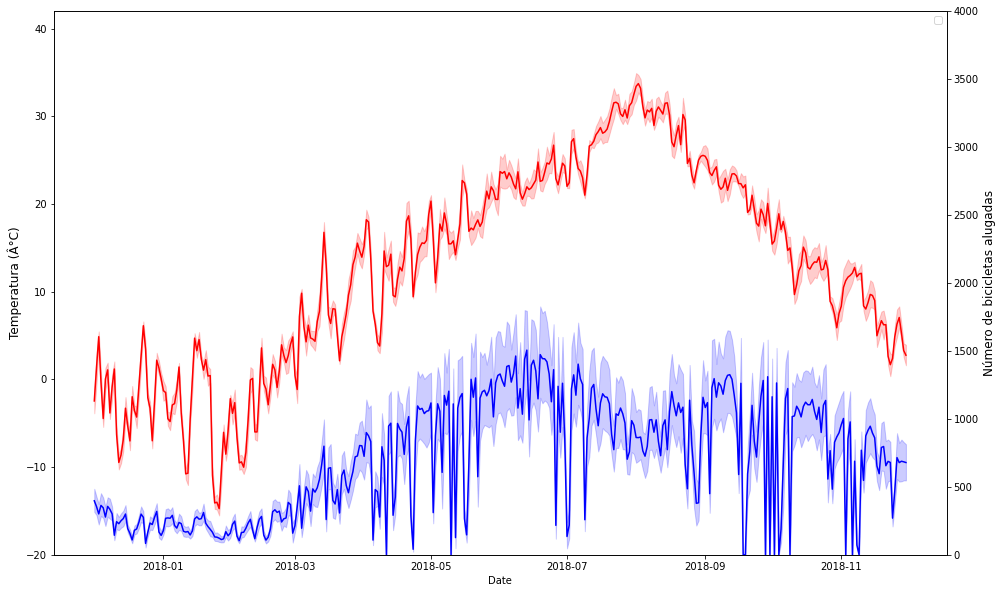

In [30]:
# Plot the temperature data
plt.figure(figsize=(16, 10))
ax = sns.lineplot(data=df, x='Date', y='Temperature(Â°C)', color='red')
ax.set_ylabel('Temperatura (Â°C)', size=12)
ax.set_ylim(-20, 42)

# Add a secondary axis for the rented bike count data
ax2 = ax.twinx()
sns.lineplot(data=df, x='Date', y='Rented Bike Count', ax=ax2, color='blue')
ax2.set_ylabel('Número de bicicletas alugadas', size=12)
ax2.set_ylim(0, 4000)
#ax2.plot(df['Date'], df['Temperature(Â°C)'], label='Temperatura', linewidth=2)

plt.legend()
plt.show()

In [24]:
df['Rented Bike Count'].min()

0